# Languages

This section provides some analyses of the languages of publications referenced in the *Bibliographie*.     

In [45]:
# === Imports === 

import re 
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import join
from os.path import realpath, dirname
import os
from lxml import etree
from io import StringIO, BytesIO
from collections import Counter
import pandas as pd
import numpy as np


# === Files and parameters === 

bibdatafile = join("data", "BIB18_Zotero-RDF_2024-01-02.rdf") 
#bibdatafile = join(wdir, "data", "BIB18_Zotero-RDF_TEST.rdf") 

namespaces = {
    "foaf" : "http://xmlns.com/foaf/0.1/",
    "bib" : "http://purl.org/net/biblio#",
    "dc" : "http://purl.org/dc/elements/1.1/",
    "z" : "http://www.zotero.org/namespaces/export#",
    "rdf" : "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    }


# === Load the dataset === 

bibdata = etree.parse(bibdatafile)

## First approach: 'language'

We can use the "language" field in the dataset. This is precise, technically speaking, but depends on the level of curation of the dataset. The language field is not fully reliable at this time. 

We don't have abstracts or full texts in the dataset, but on the basis of the titles alone, the (most likely) language of the publication has been determined. Note that an algorithmic process, based on the library py-lingua and using only the sometimes very short titles, has been used to create this data, so errors are to be expected. With the progress of corrections in the dataset, this will improve over time (and more languages are likely to be added, albeit with small numbers).

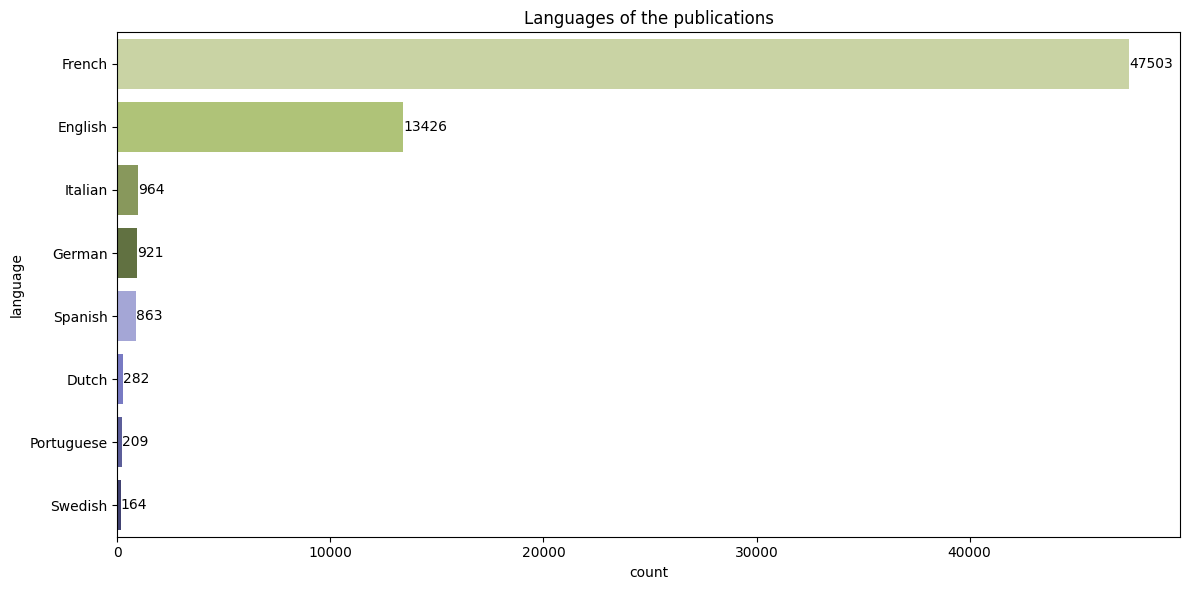

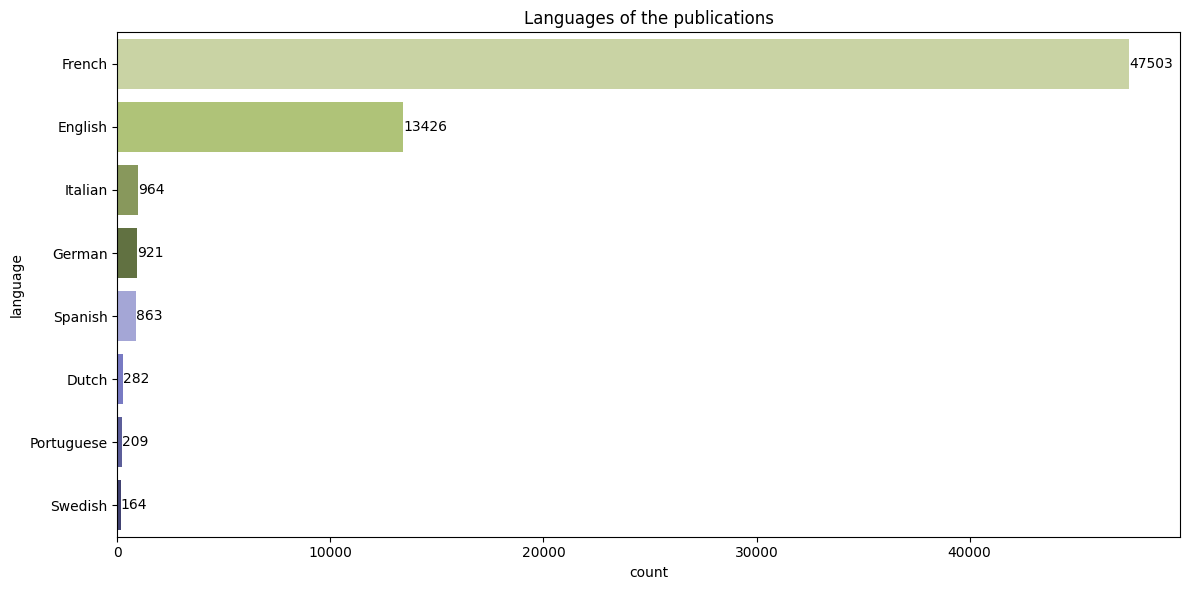

In [46]:
def get_languages(bibdata, figsize, figurefile, dpi): 

    # Find all the instances of "language" Element and its content
    xpath = "//z:language/text()"
    languages = bibdata.xpath(xpath, namespaces=namespaces)
    # Identify frequency of languages
    languages_counts = Counter(languages)
    languages_counts = dict(sorted(languages_counts.items(), key = lambda item: item[1], reverse=True)[:8])
    
 
    # Visualize using a simple bar chart 
    lc = pd.DataFrame.from_dict(languages_counts, orient="index", columns=["count"]).reset_index().rename({"index" : "language"}, axis=1)
    plt.figure(figsize=figsize)
    palette = sns.color_palette("tab20b", len(lc))
    fig = sns.barplot(
        data=lc, 
        y="language", 
        x="count", 
        hue="count", 
        legend=False, 
        palette=palette, 
        orient='h'
        )
    for i in fig.containers:
        fig.bar_label(i,)
    fig.set(title="Languages of the publications")
    plt.tight_layout()
    plt.savefig(figurefile, dpi=dpi)
    return languages, languages_counts

# Call for website
languages, languages_counts = get_languages(
    bibdata,
    figsize = (12,6),
    figurefile = join(wdir, "figures", "languages_counts.png"),
    dpi = 300
    )

# Call for poster
languages, languages_counts = get_languages(
    bibdata,
    figsize = (12,6),
    figurefile = join(wdir, "figures", "large", "languages_counts.svg"),
    dpi = 300
    )



In [47]:
    
# Provide some results as a text. 
print("There are " + str(len(languages))  + " instances of 'language' in the dataset.")
print("At the moment, only " + str(len(languages_counts)) + " different languages are considered for analysis.")
languages_perc = {k: v / len(languages) for k, v in languages_counts.items()}
print("The most prevalent language is " + str(list(languages_perc.keys())[0]) + ", with " + "{:2.2%}".format(list(languages_perc.values())[0]) + " of all entries.")




There are 64346 instances of 'language' in the dataset.
At the moment, only 8 different languages are considered for analysis.
The most prevalent language is French, with 73.82% of all entries.
